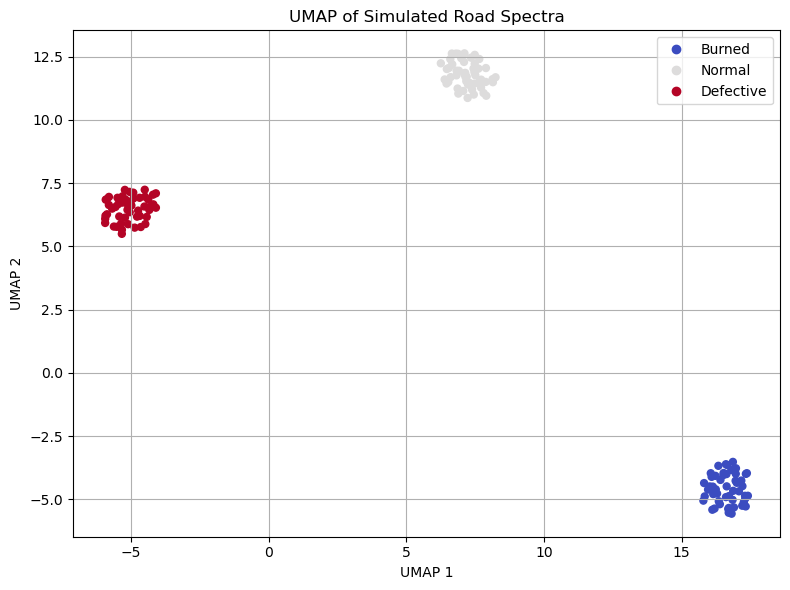

In [3]:
!pip install umap-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler

# Simulate 50 samples each of 3 road types: burned, normal, defective
np.random.seed(42)

wavelengths = np.linspace(400, 2500, 150)  # 150 spectral bands

# Create base spectra for each class
base_burned = np.exp(-0.001 * (wavelengths - 1000)**2) * 0.1 + np.random.normal(0, 0.01, 150)
base_normal = np.exp(-0.001 * (wavelengths - 1700)**2) * 0.2 + np.random.normal(0, 0.01, 150)
base_defective = np.exp(-0.001 * (wavelengths - 1300)**2) * 0.15 + np.random.normal(0, 0.01, 150)

# Generate variations
burned = base_burned + np.random.normal(0, 0.005, (50, 150))
normal = base_normal + np.random.normal(0, 0.005, (50, 150))
defective = base_defective + np.random.normal(0, 0.005, (50, 150))

# Stack all data
X = np.vstack([burned, normal, defective])
y = np.array([0]*50 + [1]*50 + [2]*50)  # Labels: 0 = burned, 1 = normal, 2 = defective

# Normalize
X_scaled = StandardScaler().fit_transform(X)

# Apply UMAP
embedding = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='coolwarm', s=25)
plt.title("UMAP of Simulated Road Spectra")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
legend_labels = ['Burned', 'Normal', 'Defective']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.grid(True)
plt.tight_layout()
plt.show()
